In [1]:
import sys; sys.path.insert(0, '../../'); sys.path.insert(0,'../mupClassification/'); sys.path.insert(0,'../off_beam_on_beam_5e19/')
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from matplotlib.pylab import *
import matplotlib.patches as patches
%matplotlib inline

OffBeam_scaling: 1.24224698773 = N(on beam)/N(off beam) before sof. trig.
MC_scaling_DATAcosmic: 0.504451038576 = N(POT on beam)/N(POT MC)
MC_scaling_MCcosmic: 0.136225100235 = N(POT on beam)/N(POT MC)


# comparison betweem MC-BNB with DATA-cosmic overlay and MC-BNB with MC-cosmic overlay, outside the FV
### Oct. 8, 2017

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/MCbnbDATAcosmicVsMCbnbMCcosmic/'

# pairs 

In [3]:
# ------------------------------------------------
def sample_out_of_FV(sample=None, max_FV_y = 110, # 115 in pandoraNu tracks collection
                     min_FV_z = 5, max_FV_z = 1037,
                     min_FV_x = 3, max_FV_x = 250): # 257
    sample_out_FV = sample[ (
                              (np.abs(sample['starty_assigned_muon']) < max_FV_y)        
                            & (np.abs(sample['starty_assigned_proton']) < max_FV_y)
                            & (np.abs(sample['endy_assigned_muon']) < max_FV_y)        
                            & (np.abs(sample['endy_assigned_proton']) < max_FV_y)
                            
                            & ((sample['startz_assigned_muon'] > min_FV_z) & (sample['startz_assigned_muon'] < max_FV_z) )
                            & ((sample['startz_assigned_proton'] > min_FV_z) & (sample['startz_assigned_proton'] < max_FV_z) )                            
                            & ((sample['endz_assigned_muon'] > min_FV_z) & (sample['endz_assigned_muon'] < max_FV_z) )
                            & ((sample['endz_assigned_proton'] > min_FV_z) & (sample['endz_assigned_proton'] < max_FV_z) )

                            & ((sample['startx_assigned_muon'] > min_FV_x) & (sample['startx_assigned_muon'] < max_FV_x) )
                            & ((sample['startx_assigned_proton'] > min_FV_x) & (sample['startx_assigned_proton'] < max_FV_x) )                            
                            & ((sample['endx_assigned_muon'] > min_FV_x) & (sample['endx_assigned_muon'] < max_FV_x) )
                            & ((sample['endx_assigned_proton'] > min_FV_x) & (sample['endx_assigned_proton'] < max_FV_x) )
            )==False
                           ]
    return sample_out_FV
# ------------------------------------------------




In [4]:
MCbnbDATAcosmicSamples_OutOfFV=dict()
MCbnbMCcosmicSamples_OutOfFV=dict()


# ------------------------------------------------
# Sep 9
def load_MCbnbMCcosmic_OutOfFV():
    global MCbnbMCcosmicSamples_OutOfFV
    MCbnbMCcosmic_DataFrame = pd.read_csv(vertices_files_path+'prodgenie_bnb_nu_cosmic_uboone_mcc8.2_reco2_vertices.csv')
    MCbnbMCcosmic_OutOfFV = sample_out_of_FV(MCbnbMCcosmic_DataFrame)
    print len(MCbnbMCcosmic_DataFrame),'pairs from MC-BNB + cosmic MC overlay'
    print len(MCbnbMCcosmic_OutOfFV),'pairs out of FV'

    for pair_type in pair_types:#{
        MCbnbMCcosmicSamples_OutOfFV[pair_type] = MCbnbMCcosmic_OutOfFV[MCbnbMCcosmic_OutOfFV[pair_type]==True]
        Ntype = len(MCbnbMCcosmicSamples_OutOfFV[pair_type])
        if pair_type=='CC 1p 0pi': print_line()
        print Ntype,'are '+pair_type+', %.1f'%(100.*float(Ntype)/len(MCbnbMCcosmic_OutOfFV))+'%'
    #}
    return MCbnbMCcosmic_OutOfFV, MCbnbMCcosmicSamples_OutOfFV
# ------------------------------------------------


# ------------------------------------------------
# Aug 30
def load_MCbnbDATAcosmic_OutOfFV():
    global MCbnbDATAcosmicSamples_OutOfFV
    MCbnbDATAcosmic_DataFrame = pd.read_csv(vertices_files_path+'prodgenie_bnb_nu_uboone_overlay_mcc8_reco2_vertices.csv')
    MCbnbDATAcosmic_OutOfFV = sample_out_of_FV(MCbnbDATAcosmic_DataFrame)
    print len(MCbnbDATAcosmic_DataFrame),'pairs from MC-BNB + cosmic DATA overlay'
    print len(MCbnbDATAcosmic_OutOfFV),'pairs out of FV'
    for pair_type in pair_types:#{
        MCbnbDATAcosmicSamples_OutOfFV[pair_type] = MCbnbDATAcosmic_OutOfFV[MCbnbDATAcosmic_OutOfFV[pair_type]==True]
        Ntype = len(MCbnbDATAcosmicSamples_OutOfFV[pair_type])
        if pair_type=='CC 1p 0pi': print_line()
        print Ntype,'are '+pair_type+', %.1f'%(100.*float(Ntype)/len(MCbnbDATAcosmic_OutOfFV))+'%'
    #}
    return MCbnbDATAcosmic_OutOfFV, MCbnbDATAcosmicSamples_OutOfFV
# ------------------------------------------------




In [5]:
MCbnbDATAcosmic_OutOfFV, MCbnbDATAcosmicSamples_OutOfFV = load_MCbnbDATAcosmic_OutOfFV()
print 
MCbnbMCcosmic_OutOfFV, MCbnbMCcosmicSamples_OutOfFV = load_MCbnbMCcosmic_OutOfFV()

50859 pairs from MC-BNB + cosmic DATA overlay
20534 pairs out of FV
1853 are 1mu-1p, 9.0%
1758 are other pairs, 8.6%
16923 are cosmic, 82.4%
--------------------------------------------------------------
700 are CC 1p 0pi, 3.4%

138749 pairs from MC-BNB + cosmic MC overlay
43073 pairs out of FV
9842 are 1mu-1p, 22.8%
5222 are other pairs, 12.1%
28056 are cosmic, 65.1%
--------------------------------------------------------------
4138 are CC 1p 0pi, 9.6%


## PIDa

In [6]:
def plot_diff_DATAcosmicVsMCcosmic_1d(var = 'PIDa_assigned_proton'
                                      ,x_label = r'$PID_a^{p}$'
                                      ,bins = np.linspace(0,30,50)
                                      ,fontsize = 25,figsize=(18,12)
                                      ,legend_subplots=[0,1,2,3],legend_loc=['best','best','best','best']
                                      ,mul=1):

    fig = plt.figure(figsize=figsize)
    for i,(pair_type,color,MClabel) in enumerate(zip(pair_types,MCcolors,MClabels)):
        ax=fig.add_subplot(2,2,i+1)
        ax.set_title(MClabel,y=1.02,fontsize=fontsize)
        for i_sample,(label,sample,ls) in enumerate(zip(['cosmic DATA overlay','cosmic MC overlay']
                                                        ,[MCbnbDATAcosmicSamples_OutOfFV[pair_type],MCbnbMCcosmicSamples_OutOfFV[pair_type]]                                                       
                                                        ,['-','--']
                                                       )):
            plt.hist(mul*sample[var],bins=bins,color=color,linestyle=ls,histtype='step',linewidth=3+i_sample,normed=1)
            plt.plot([0,0],[0,0],color=color,linestyle=ls,linewidth=3,label=label)
        set_axes(ax,x_label if i>=2 else ''
                 ,'normalized counts [a.u.]' if i==0 or i==2 else ''
                 ,do_add_grid=True
                 ,do_add_legend=True if i in legend_subplots else False, legend_loc=legend_loc[i] if i in legend_subplots else None
                 ,fontsize=fontsize)
        
    plt.tight_layout()

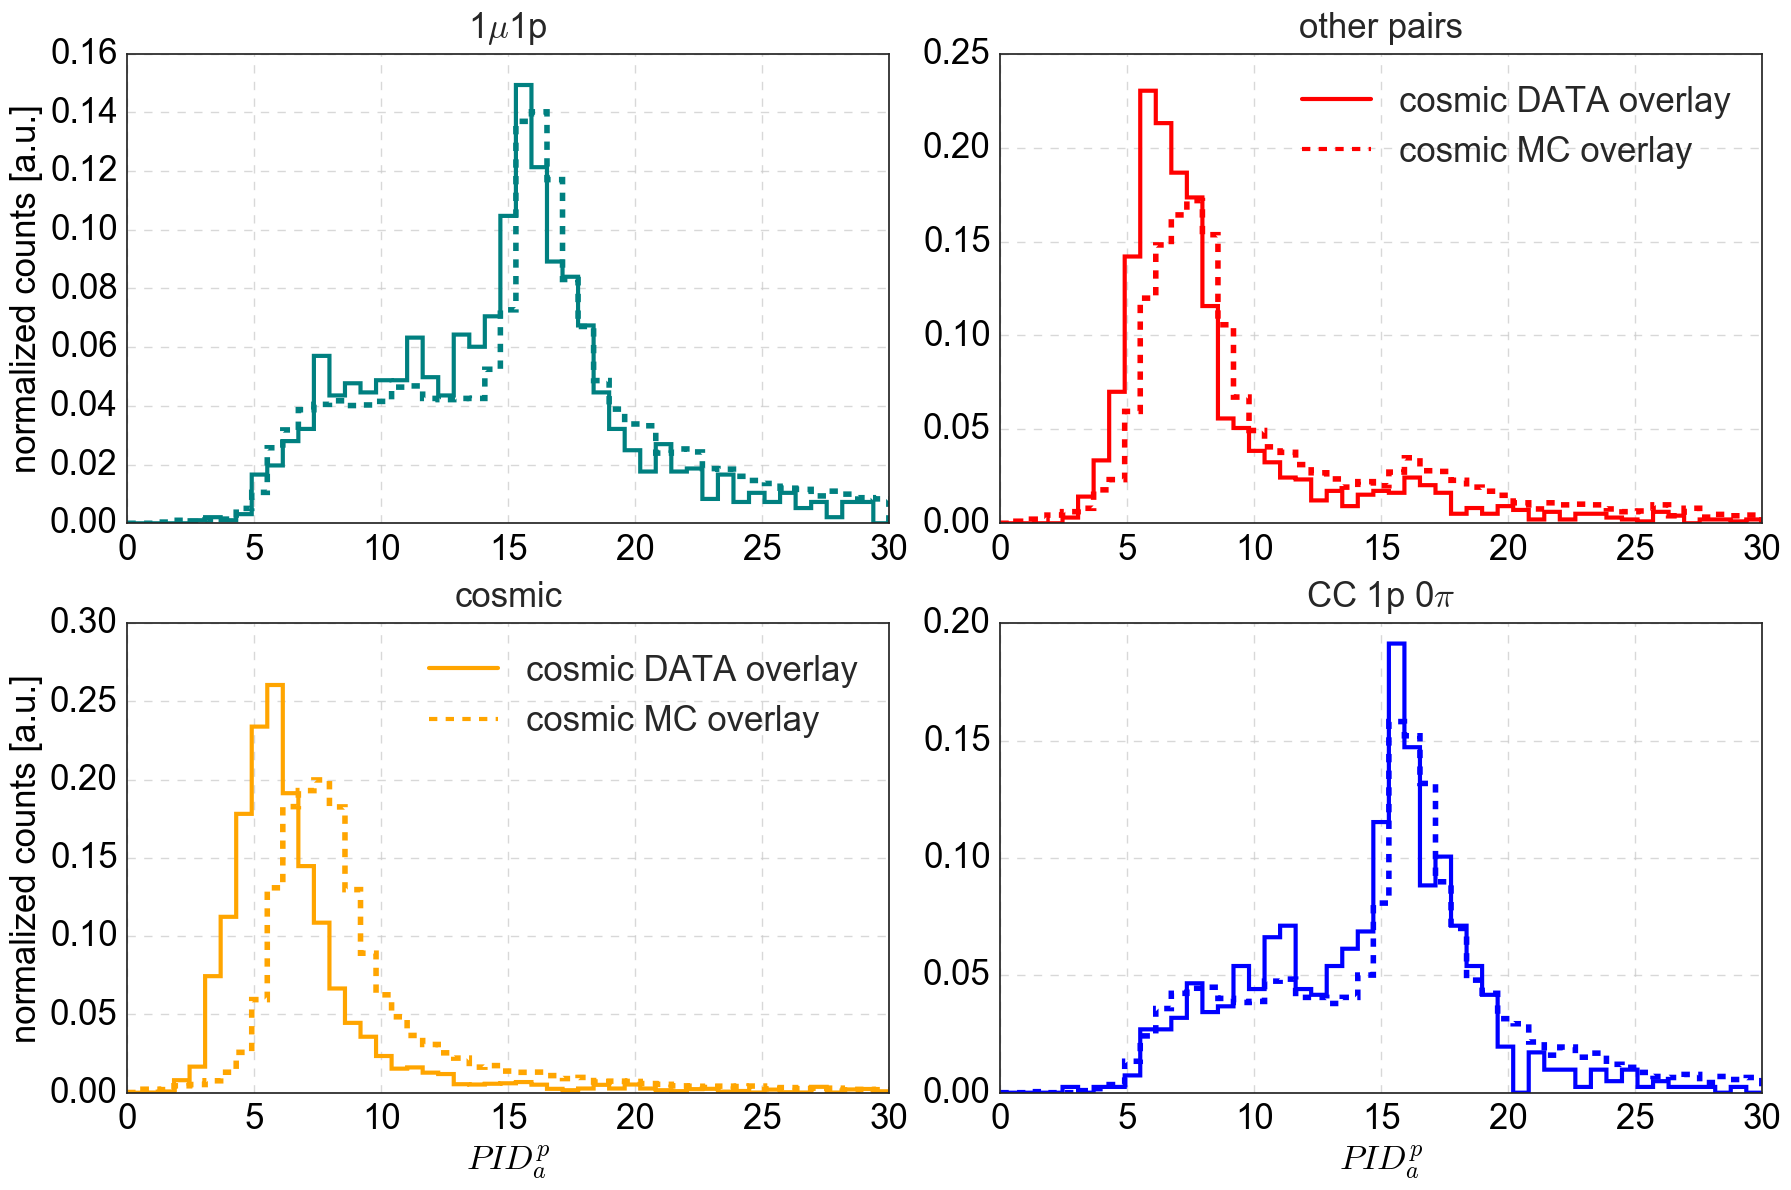

In [7]:
plot_diff_DATAcosmicVsMCcosmic_1d(var = 'PIDa_assigned_proton'
                                      ,x_label = r'$PID_a^{p}$'
                                      ,bins = np.linspace(0,30,50)
                                      ,legend_subplots=[1,2])

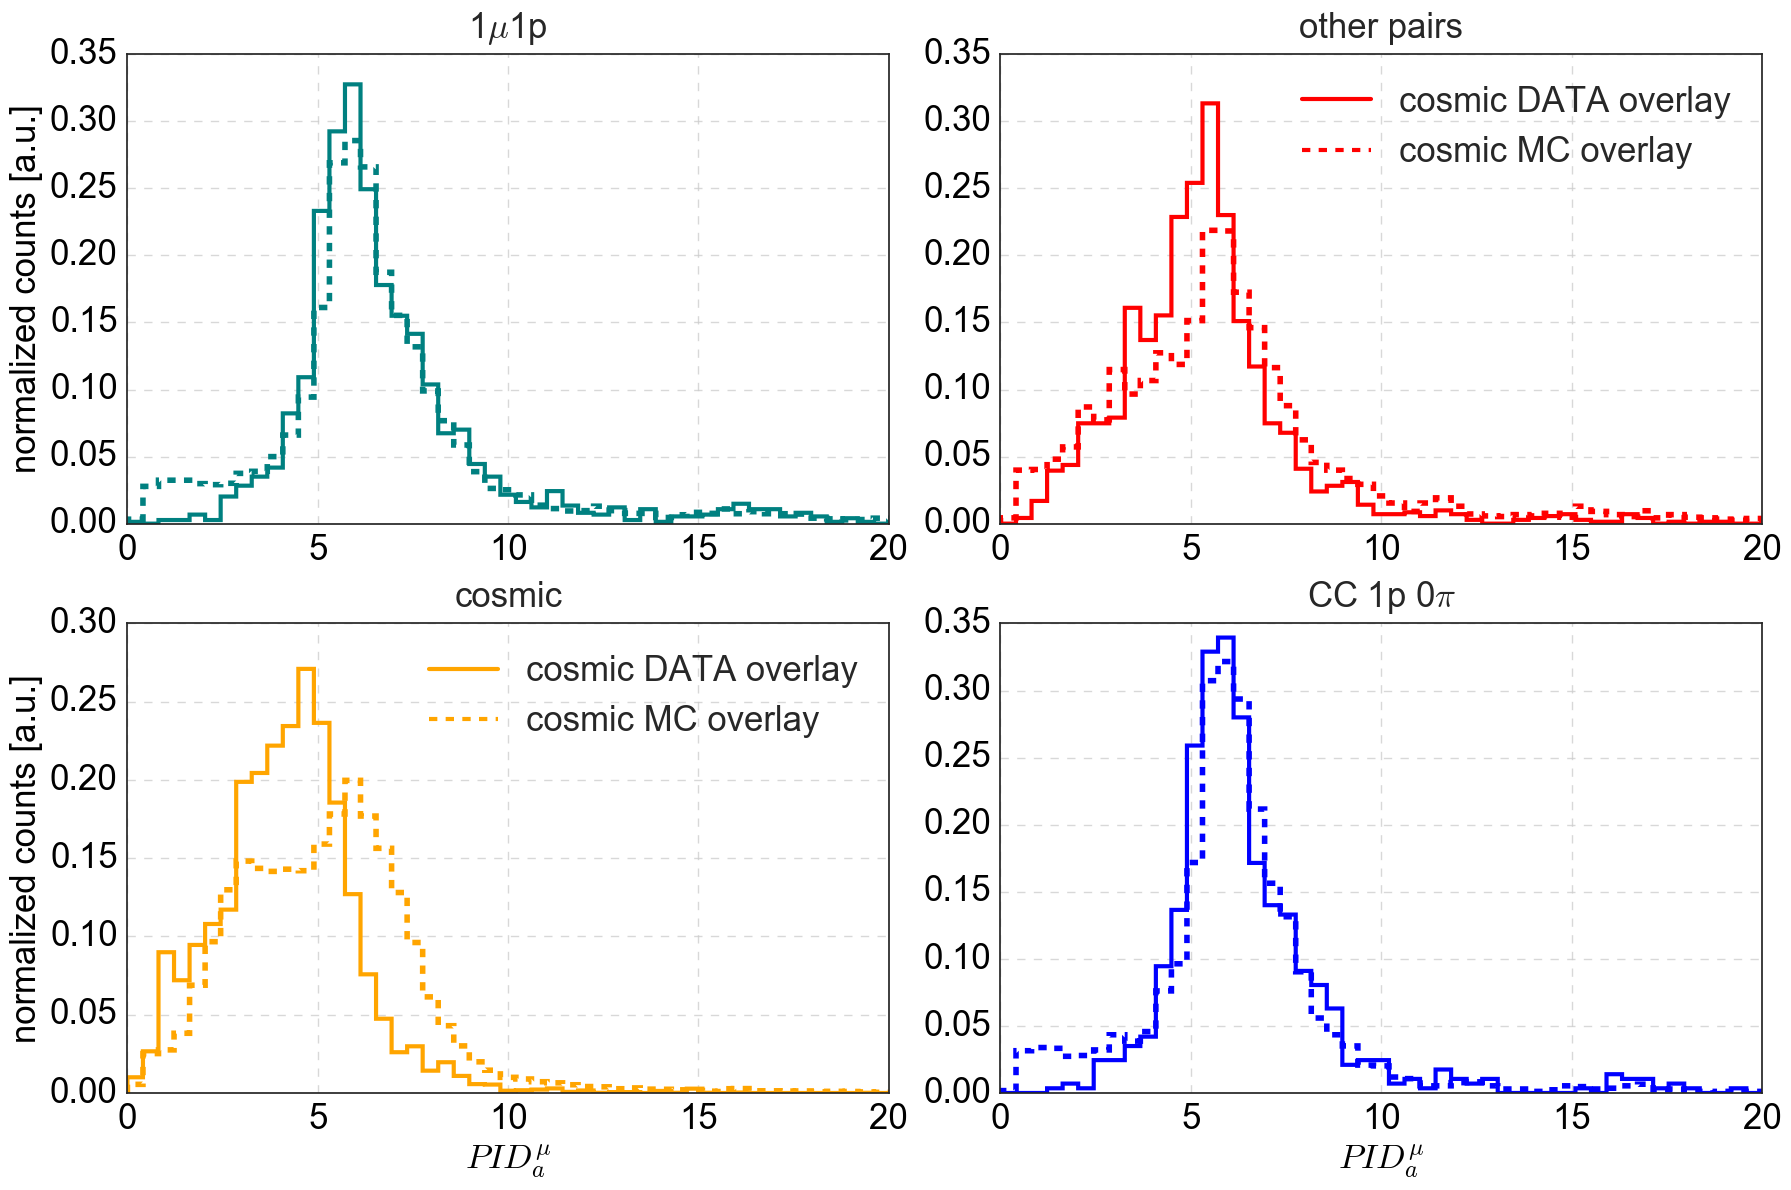

In [8]:
plot_diff_DATAcosmicVsMCcosmic_1d(var = 'PIDa_assigned_muon'
                                      ,x_label = r'$PID_a^{\mu}$'
                                      ,bins = np.linspace(0,20,50)
                                      ,legend_subplots=[1,2])

# Plot each of the MC samples together with Off-beam data

In [9]:
OffBeam = pd.concat([pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_extbnb_v8_mcc8_v04_26_04_05_v04_vertices.csv')
                     ,pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_extbnb_v8_mcc8_v04_26_04_05_v05_vertices.csv')])
OffBeam_Out_Of_FV = sample_out_of_FV(OffBeam)
print len(OffBeam),'pairs from Off-Beam'
print len(OffBeam_Out_Of_FV),'pairs from Off-Beam out of FV'

108434 pairs from Off-Beam
41867 pairs from Off-Beam out of FV


In [10]:
OnBeam = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prod_reco2_bnb_v8_mcc8_vertices.csv')
OnBeam_Out_Of_FV = sample_out_of_FV(OnBeam)
print len(OnBeam),'pairs from On-Beam'
print len(OnBeam_Out_Of_FV),'pairs from On-Beam out of FV'

162536 pairs from On-Beam
61858 pairs from On-Beam out of FV


In [11]:
def plot_stacked_MCsamples( ax=None, MCsamples = None , MC_scaling=MC_scaling_DATAcosmic
                           , var=None, bins=None , N_OnBeam_minus_OffBeam=1, alpha=0.8):
    Nall_pairs = len(MCsamples['1mu-1p']+MCsamples['cosmic']+MCsamples['other pairs'])

    x_array, weights_array = [] , []
    label_array , color_array = [] , []
    # stack background (cosmic, other-pairs) + 1µ1p pairs
    for i_pair_type in [2,1,0]:
        pair_type=pair_types[i_pair_type]
        sample = MCsamples[pair_type]; 
        label_array.append(MClabels[i_pair_type]); 
        color_array.append(MCcolors[i_pair_type]);
        x = sample[var]
        x_array.append(x)
        # normalize the MC to have the same number of events as the total On-Off beam sample
        weights_array.append (MC_scaling * np.ones(len(x)) )
        # -- - - - --------- - - -- ---- -  - --- -- -- -- --
    bin_width = bins[1]-bins[0]
    h,bins_arr,_=ax.hist( x_array , weights=weights_array
                     , bins=bins-0.5*bin_width, width=bin_width
                     , stacked=True 
                     , color=color_array
                     , label=label_array
                     , alpha=alpha)            
    h_stack = h[0]+h[1]+h[2]
    if np.max(h[2])>np.max(ax.get_ylim()):
        ax.set_ylim(np.min(ax.get_ylim()),1.05*np.max(h[2]))
        
    # add CC1p0π as a box inside the 1µ1p 
    sample = MCsamples[pair_types[3]]
    hCC1p0pi,edges = np.histogram( sample[var] , weights=MC_scaling*np.ones(len(sample)) , bins=bins )
    for bin in range(len(bins[:-2])):
        x, dx = bins[bin+1] - 0.4*bin_width, bin_width 
        y, dy = 0.99*h[2][bin+1] - hCC1p0pi[bin], hCC1p0pi[bin]
        ax.add_patch( patches.Rectangle( (x, y),dx,dy, facecolor=MCcolors[3],alpha=0.8*alpha,label=MClabels[3] if bin==0 else None))

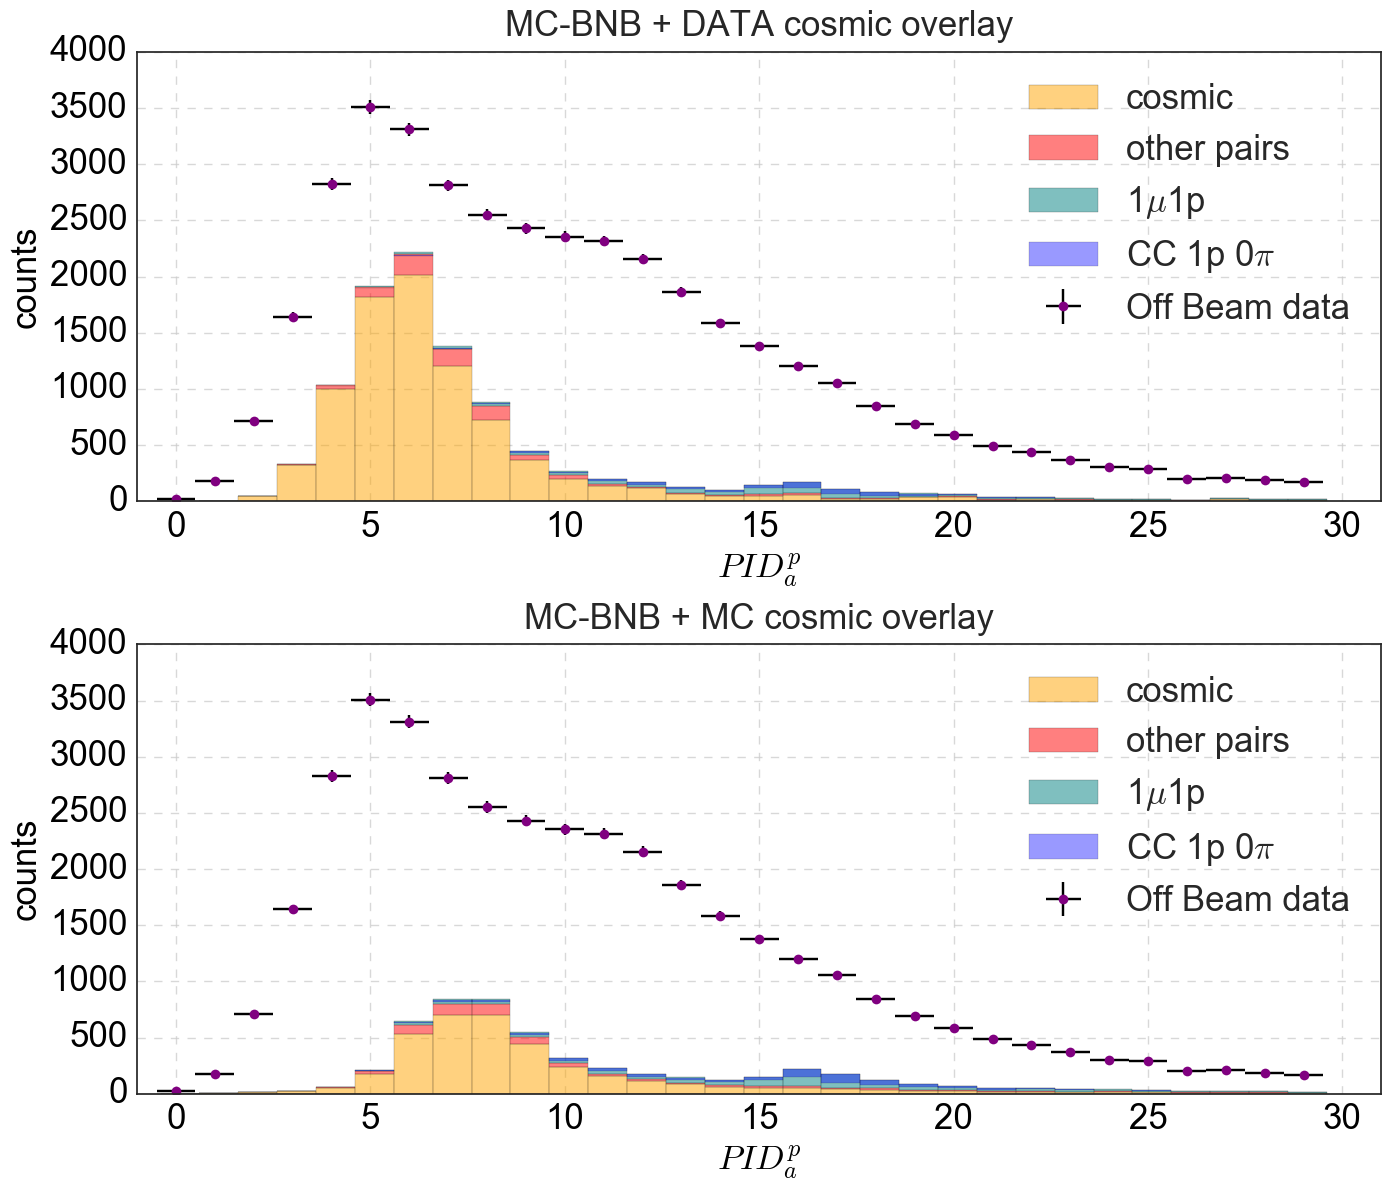

In [13]:
OffBeamSample=OffBeam_Out_Of_FV 
OnBeamSample=OnBeam_Out_Of_FV 

var='PIDa_assigned_proton' 
x_label='$PID_a^p$' 
bins=np.linspace(0,30,31) 
figsize=(14,12)
fontsize=25
color='purple'
MCalpha=0.5
bin_width = bins[1]-bins[0]
fig=plt.figure(figsize=figsize)


h_OnBeam,edges = np.histogram( OnBeamSample[var] , bins=bins )
h_OnBeam_err = np.sqrt(h_OnBeam)
h_OffBeam,edges = np.histogram( OffBeamSample[var] , bins=bins )
h_OffBeam_err = np.sqrt(h_OffBeam)
    
h_OnBeam_minus_OffBeam = h_OnBeam - OffBeam_scaling*h_OffBeam
h_OnBeam_minus_OffBeam_err = np.sqrt( np.square(h_OnBeam_err) + np.square(OffBeam_scaling*h_OffBeam_err)  )
    
ax=fig.add_subplot(2,1,1)

# plt.errorbar( x = bins[:-1], xerr=bin_width/2.
#                  , y=h_OnBeam_minus_OffBeam , yerr=h_OnBeam_minus_OffBeam_err
#                  , fmt='o', color=color , ecolor='black', label='(On-Off) Beam'
#                 )
plt.errorbar( x = bins[:-1], xerr=bin_width/2.
                 , y=h_OffBeam , yerr=h_OffBeam_err
                 , fmt='o', color=color , ecolor='black', label='Off Beam data'
                )
plot_stacked_MCsamples( ax=ax
                       , MCsamples = MCbnbDATAcosmicSamples_OutOfFV , var=var, bins=bins , MC_scaling=MC_scaling_DATAcosmic
                       , alpha=MCalpha)
set_axes(ax,x_label=x_label,y_label='counts',do_add_grid=True,fontsize=fontsize,
         xlim=(np.min(bins)-bin_width,np.max(bins)+bin_width),
#          ylim=(-10,2500),
         do_add_legend=True,
         title = 'MC-BNB + DATA cosmic overlay'
        )

    
ax=fig.add_subplot(2,1,2)
# plt.errorbar( x = bins[:-1], xerr=bin_width/2.
#                  , y=h_OnBeam_minus_OffBeam , yerr=h_OnBeam_minus_OffBeam_err
#                  , fmt='o', color=color , ecolor='black', label='(On-Off) Beam'
#                 )
plt.errorbar( x = bins[:-1], xerr=bin_width/2.
                 , y=h_OffBeam , yerr=h_OffBeam_err
                 , fmt='o', color=color , ecolor='black', label='Off Beam data'
                )
plot_stacked_MCsamples( ax=ax
                       , MCsamples = MCbnbMCcosmicSamples_OutOfFV , var=var, bins=bins , MC_scaling=MC_scaling_MCcosmic
                       , alpha=MCalpha)
    
set_axes(ax,x_label=x_label,y_label='counts',do_add_grid=True,fontsize=fontsize,
         xlim=(np.min(bins)-bin_width,np.max(bins)+bin_width),
#          ylim=(-10,1200),
         do_add_legend=True,
         title = 'MC-BNB + MC cosmic overlay'
        )

plt.tight_layout()
plt.savefig(figures_path+'MCbnb'+'cosmicSamples_vs_OffBeamData_OutOfFV.pdf')